Load and Inspect the Data

In this first step I imported the EMS dataset: 

Load the .csv file from WPRDC

I cleaned and simplified the column names

Then Examined the first few rows to understand the structure of the data

This helps us identify what variables we can use to define our custom “Best District Score.”

In [14]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
 df = pd.read_csv("Emergency.csv")

In [16]:
df.head()

,_id,Shape__Area,Shape__Length,acres,area,district,objectid,perimeter,rams_,rams_id,sqmiles,geometry
0,1,1.089535e+08,65491.366021,2501.229980,1.089535e+08,4,1,65491.364725,60,915,3.91,POLYGON ((584246.8827731923665851 4481776.6665...
1,2,2.859605e+07,39150.158189,656.469971,2.859605e+07,9,2,39150.158174,86,786,1.03,POLYGON ((590483.1125030989060178 4478834.7564...
2,3,1.006612e+08,76786.588221,2310.860107,1.006612e+08,11,3,76786.588197,103,762,3.61,POLYGON ((595359.1996708255028352 4479402.6720...
3,4,7.606784e+07,44022.612805,1746.280029,7.606783e+07,5,4,44022.611587,105,836,2.73,POLYGON ((587717.1754193623783067 4479153.7730...
4,5,1.501305e+08,71746.234309,3446.520020,1.501305e+08,7,5,71746.234269,160,818,5.39,POLYGON ((590945.5534668449545279 4476937.4259...


The “Best District Score”

Having the fewest incidents per square mile, which represents a safer district

To calculate this, I created two key metrics:

Incident Density:

Incidents per sq. mile =
rams_/sq miles

Best District Score: Best Score =
(1-Incident Density-min/max-min)x100)

A higher score means fewer incidents relative to the district’s size, a strong indicator of safety.

In [17]:
df['incidents_per_sqmi'] = df['rams_'] / df['sqmiles']

min_density = df['incidents_per_sqmi'].min()
max_density = df['incidents_per_sqmi'].max()
df['best_district_score'] = (1 - (df['incidents_per_sqmi'] - min_density) / (max_density - min_density)) * 100

df_sorted = df.sort_values('best_district_score', ascending=False)

df_sorted[['district', 'rams_', 'sqmiles', 'incidents_per_sqmi', 'best_district_score']].head()


,district,rams_,sqmiles,incidents_per_sqmi,best_district_score
9,10,2,4.67,0.428266,100.000000
16,1,6,3.86,1.554404,99.857789
19,6,9,4.69,1.918977,99.811750
8,10,2,0.23,8.695652,98.955979
0,4,60,3.91,15.345268,98.116253



Now that we have the “Best District Score,” here is a bar chart.


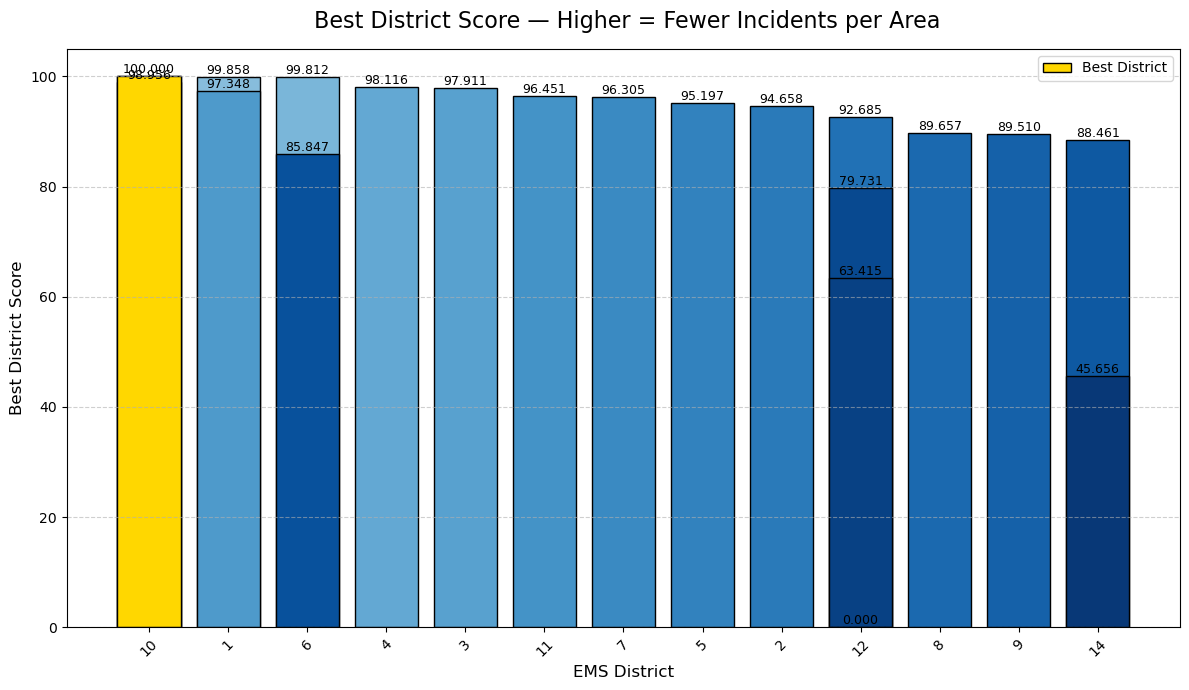

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x = df_sorted['district'].astype(str)
y = df_sorted['best_district_score']

colors = plt.cm.Blues(np.linspace(0.4, 1, len(df_sorted)))

plt.figure(figsize=(12,7))
bars = plt.bar(x, y, color=colors, edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.0002,
             f"{height:.3f}", ha='center', va='bottom', fontsize=9)


plt.title(" Best District Score — Higher = Fewer Incidents per Area", fontsize=16, pad=15)
plt.xlabel("EMS District", fontsize=12)
plt.ylabel("Best District Score", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)


best_idx = y.idxmax()
best_district = str(df_sorted.loc[best_idx, 'district'])
best_value = df_sorted.loc[best_idx, 'best_district_score']
plt.bar(best_district, best_value, color='gold', edgecolor='black', label='Best District')
plt.legend()

plt.tight_layout()
plt.show()


Step 4: Identify the Top District
Finally, above is a display summary of the top-performing EMS district based on my “Best District Score.”
This provides a quick overview of its safety characteristics, including incidents, area, and score.

In [8]:
top = df_sorted.iloc[0]

print(" **Best EMS District Summary**")
print(f"District Number: {int(top['district'])}")
print(f"Total Incidents (RAMS): {top['rams_']}")
print(f"Area (Square Miles): {top['sqmiles']:.2f}")
print(f"Incidents per Square Mile: {top['incidents_per_sqmi']:.2f}")
print(f"Best District Score (0–100): {top['best_district_score']:.1f}")


 **Best EMS District Summary**
District Number: 10
Total Incidents (RAMS): 2
Area (Square Miles): 4.67
Incidents per Square Mile: 0.43
Best District Score (0–100): 100.0
